# Flujos de Couette y de Poiseuille

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Parámetros

In [6]:
L  = 1.0           # longitud del sistema 1D
nx = 42            # nodos espaciales
dx = L / (nx+1)    
x = np.linspace( 0 , L - dx , num=nx )

T= 0.1            # tiempo total
nt = 500            # pasos temporales
dt = T / nt

nu = 1             # coeficiente de viscosidad dinámica

Número de Reynolds

In [7]:
##   Re  ??? Co =  * dt / nu

In [8]:
CoD = nu*dt/dx**2
CoD

0.3698000000000001

# Couette

### Condiciones iniciales

In [10]:
u0 = np.zeros(nx)                    # todo cero
u0[ 0 ] = 1

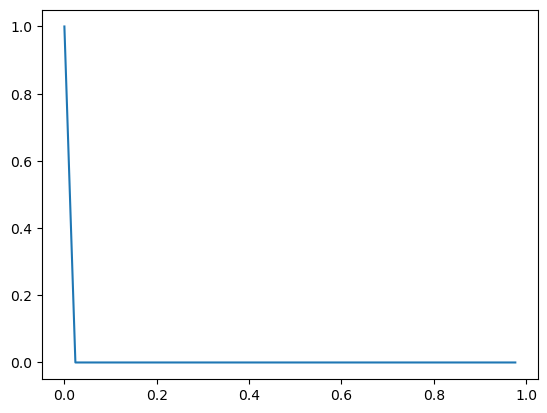

In [11]:
plt.plot( x , u0 )

### Un paso en el tiempo

In [12]:
u = u0.copy()

In [13]:
un = u.copy()         # distribución actual

i = 0
u[i] = un[i] + (CoD / 2.0) * (un[i+1] + 1 - 2*u[0] )

for i in range( 1 , nx - 1 ):
   u[i] = un[i] + (CoD / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )

i = nx - 1

u[i] = un[i] + (CoD / 2.0) * ( 0 + un[i-1] - 2 * un[i] )


        

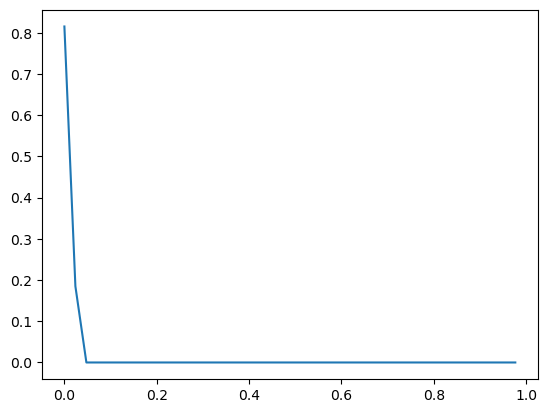

In [14]:
plt.plot(x,u)

### Tiempo completo

In [33]:
u = u0.copy()

In [34]:
for n in range(nt):
    un = u.copy()

    i = 0
    u[i] = un[i] + (CoD / 2.0) * (un[i+1] + 1 - 2* u[0] )

    for i in range( 1 , nx - 1 ):
       u[i] = un[i] + (CoD / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )

    i = nx - 1

    u[i] = un[i] + (CoD / 2.0) * ( 0 + un[i-1] - 2 * un[i] )        

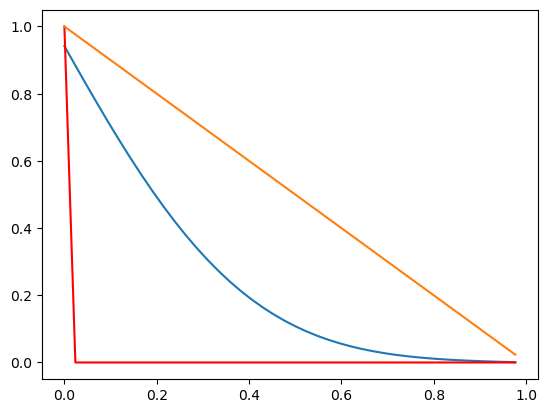

In [35]:
plt.plot(x , u , x , u0 , 'r', x , 1-x)

# Poiseuille

In [36]:
c = 1              # caída de presión
nu = 1             # coeficiente de viscosidad dinámica

In [37]:
u0 = np.zeros( nx )

### Un paso en el tiempo

In [38]:
u = u0.copy()

In [39]:
un = u.copy()         # distribución actual

i = 0
u[i] = un[i] +  c * dt + (CoD / 2.0) * (un[i+1] + 0 - 2*u[0] )

for i in range( 1 , nx - 1 ):
   u[i] = un[i] +  c * dt + (CoD / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )

i = nx - 1

u[i] = un[i] +  c * dt +(CoD / 2.0) * ( 0 + un[i-1] - 2 * un[i] )


        

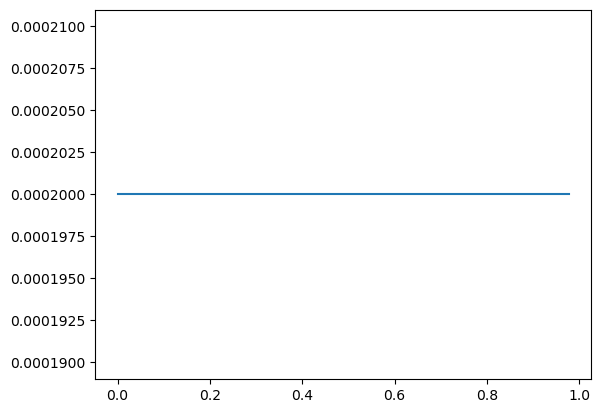

In [40]:
plt.plot(x,u)

### Tiempo completo

In [44]:
u = u0.copy()

In [62]:
for n in range(nt):
    un = u.copy()

    i = 0
    u[i] = un[i] + c * dt + (CoD / 2.0) * (un[i+1] + 0 - 2* u[0] )

    for i in range( 1 , nx - 1 ):
       u[i] = un[i] + c * dt + (CoD / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )

    i = nx - 1

    u[i] = un[i] + c * dt + (CoD / 2.0) * ( 0 + un[i-1] - 2 * un[i] )        

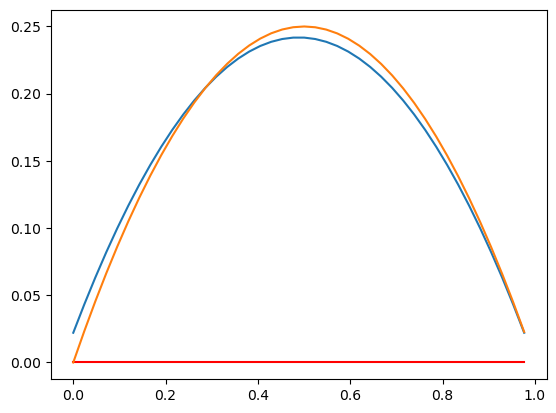

In [63]:
plt.plot(x , u , x , u0 , 'r', x , x*(1-x)/nu )